In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [4]:
x = df.iloc[:,0:6]
y = df.iloc[:,6]

In [5]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
# after transform x columns will change
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('oh',OneHotEncoder(),[0])],remainder = 'passthrough')
x = ct.fit_transform(x)

In [7]:
x.shape

(159, 12)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = mlr.predict(x_test)
y_pred

array([4.38279449, 3.38339191, 3.88402001, 3.76583349, 5.96668042,
       6.89927111, 6.58442579, 4.02007325, 6.93611506, 3.59590466,
       3.46223608, 4.79632112, 7.10072125, 7.39434824, 2.00004199,
       3.04268687, 3.55898264, 6.94110772, 3.76244959, 5.97203357,
       2.00994396, 5.25582111, 3.72337595, 7.62736022, 2.42744522,
       4.82327473, 5.90333898, 4.66318611, 6.90514304, 1.24892365,
       5.24826435, 3.54063573])

In [11]:
y_test.values

array([4.69  , 3.3516, 3.725 , 3.8203, 6.3875, 7.225 , 6.5736, 4.0198,
       6.7473, 3.3075, 3.3756, 4.3225, 6.525 , 8.142 , 2.3142, 2.9044,
       3.5478, 6.144 , 3.534 , 6.09  , 2.3265, 5.355 , 3.4075, 7.48  ,
       2.673 , 4.8438, 5.589 , 4.2485, 7.1064, 1.38  , 5.7276, 3.995 ])

In [12]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_pred,y_test)
accuracy

0.9631235635782059

In [13]:
df.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


In [19]:
mlr.predict(ct.transform([['Bream',700,40.2,35.3,37.2,12.5,5.002]]))

array([4.83161746])

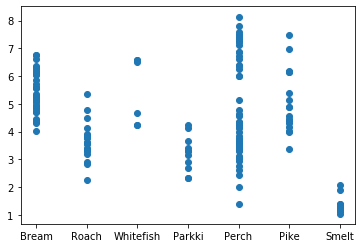

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df['Species'],df['Width'])
plt.show()